<a href="https://colab.research.google.com/github/NguyenHien19/XLTN-MFCC-DTW-HMM/blob/main/Exercise2_19021267.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np

## Loading audio files

In [2]:
audio_file = "1.wav"

In [3]:
ipd.Audio(audio_file)

In [4]:
# load audio files with librosa
signal, sr = librosa.load(audio_file)

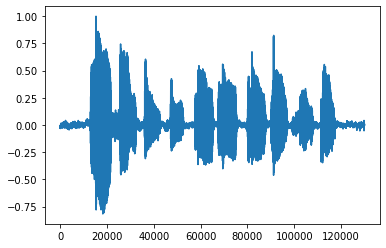

In [5]:
plt.plot(signal)

In [6]:
len(signal), sr

(129934, 22050)

## Extracting MFCC

In [7]:
# more parameters from librosa.feature.melspectrogram
mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)

In [8]:
mfccs.shape # (n_mfcc, số frame)

(13, 254)

In [9]:
129934/512 # number_of_frame = audio_length / hop_length

253.77734375

## Visualizing MFCCs

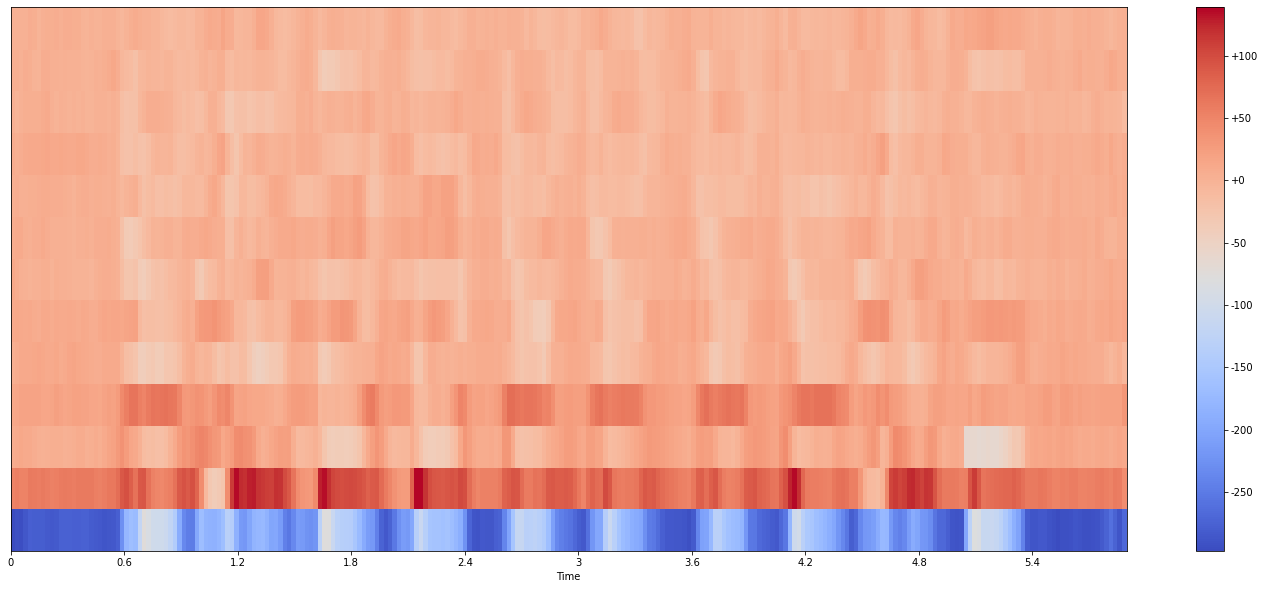

In [10]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(mfccs, x_axis="time", sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

## Computing first / second MFCCs derivatives

In [11]:
delta_mfccs = librosa.feature.delta(mfccs)

In [12]:
delta_mfccs.shape

(13, 254)

In [13]:
delta2_mfccs = librosa.feature.delta(mfccs, order=2)

In [14]:
delta2_mfccs.shape

(13, 254)

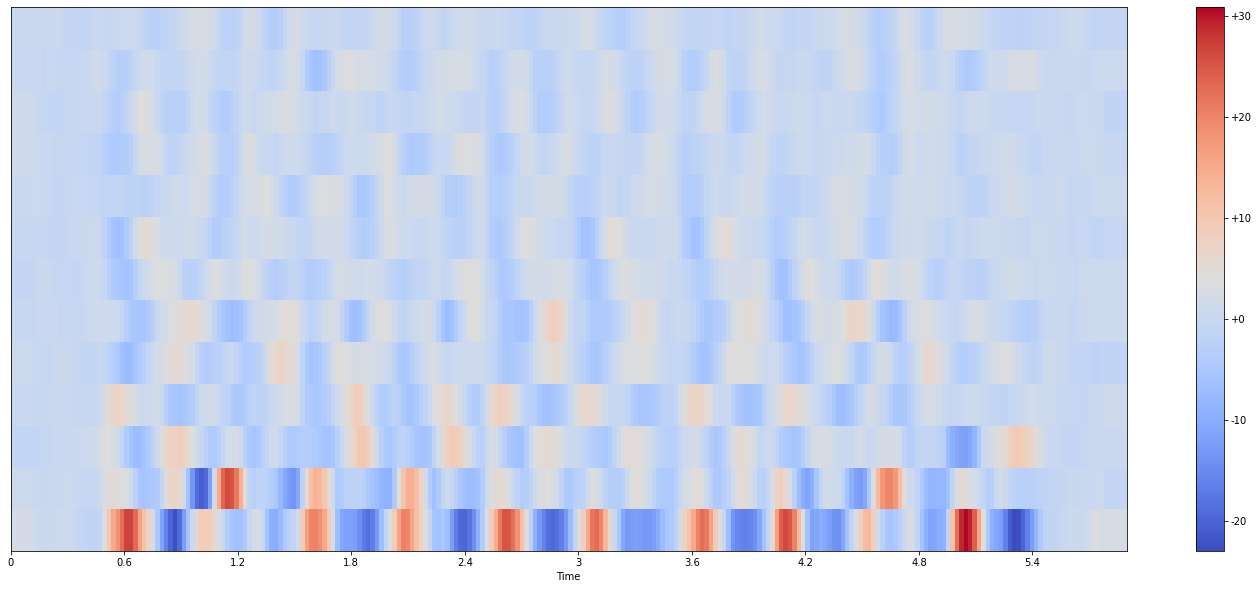

In [15]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta_mfccs, x_axis="time", sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

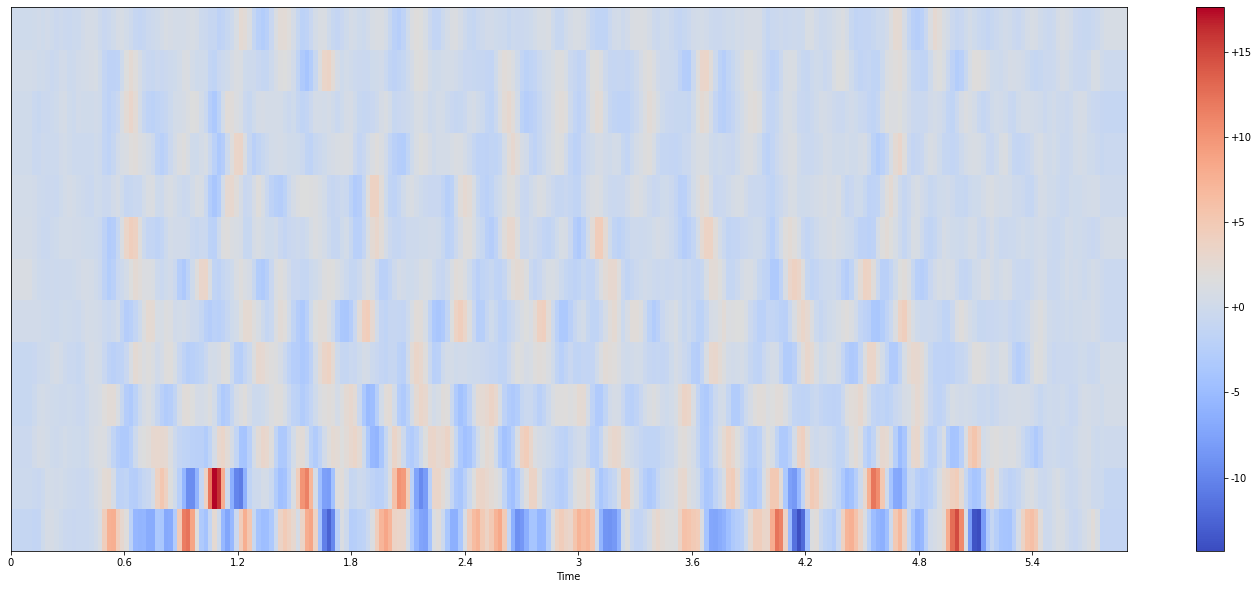

In [16]:
plt.figure(figsize=(25, 10))
librosa.display.specshow(delta2_mfccs, x_axis="time", sr=sr)
plt.colorbar(format="%+2.f")
plt.show()

In [17]:
mfccs_features = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))

In [18]:
mfccs_features.shape

(39, 254)

In [19]:
mfccs_features

array([[-2.96339294e+02, -2.92422607e+02, -2.93975830e+02, ...,
        -2.74829926e+02, -2.88163391e+02, -2.69067108e+02],
       [ 5.34990234e+01,  5.55046043e+01,  5.37299728e+01, ...,
         6.00510483e+01,  5.76293526e+01,  4.24845772e+01],
       [ 7.99649429e+00,  1.01768808e+01,  1.29476032e+01, ...,
         1.20109987e+01,  1.49145584e+01,  1.11762276e+01],
       ...,
       [ 1.06827565e-01,  1.06827565e-01,  1.06827565e-01, ...,
        -9.87932801e-01, -9.87932801e-01, -9.87932801e-01],
       [ 4.12376046e-01,  4.12376046e-01,  4.12376046e-01, ...,
        -3.19748223e-01, -3.19748223e-01, -3.19748223e-01],
       [-5.79974651e-02, -5.79974651e-02, -5.79974651e-02, ...,
         8.62083852e-01,  8.62083852e-01,  8.62083852e-01]], dtype=float32)

## Applying DTW

In [20]:
signal1, sr1 = librosa.load('c1 h.wav')
signal2, sr2 = librosa.load('c1 k.wav')
signal3, sr3 = librosa.load('c1 t.wav')

In [22]:
 ipd.Audio(data=signal1, rate=sr1)

In [23]:
 ipd.Audio(data=signal2, rate=sr2)

In [24]:
 ipd.Audio(data=signal3, rate=sr3)

In [30]:
def mfccs_extracting(signal, sr):
    mfccs = librosa.feature.mfcc(y=signal, n_mfcc=13, sr=sr)
    delta_mfccs = librosa.feature.delta(mfccs)
    delta2_mfccs = librosa.feature.delta(mfccs, order=2)
    mfccs_features = np.concatenate((mfccs, delta_mfccs, delta2_mfccs))
    return mfccs_features

In [33]:
mfccs_features1 = mfccs_extracting(signal1, sr1)
mfccs_features2 = mfccs_extracting(signal2, sr2)
mfccs_features3 = mfccs_extracting(signal3, sr3)

In [46]:
X = mfccs_features2
Y = mfccs_features3
D, wp = librosa.sequence.dtw(X, Y, subseq=True)

[(0.0, 2.0), (0.0, 311.0), Text(0.5, 1.0, 'Matching cost function')]

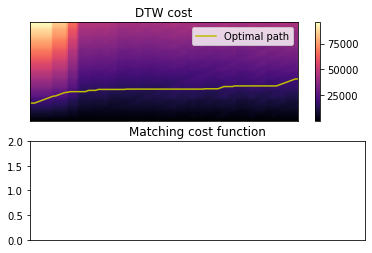

In [53]:
fig, ax = plt.subplots(nrows=2, sharex=True)
img = librosa.display.specshow(D, ax=ax[0])
ax[0].set(title='DTW cost')
ax[0].plot(wp[:, 1], wp[:, 0], label='Optimal path', color='y')
ax[0].legend()
fig.colorbar(img, ax=ax[0])
ax[1].plot(D[-1, :] / wp.shape[0])
ax[1].set(xlim=[0, Y.shape[1]], ylim=[0, 2], title='Matching cost function')